In [35]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [36]:
type(data)

dict

In [37]:
import pandas as pd


#This allows to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10981,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.967972e+07,1.967972e+07,False,NaN,1,NaN,NaN,None,2024-04-11T15:55:00.000Z,69743.033977,3.575124e+10,4.8145,-0.200407,1.527178,3.048351,-2.862632,44.868832,56.764484,1.372524e+12,52.8087,1.464604e+12,None,2024-04-11T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:55:38.558816
1,1027,Ethereum,ETH,ethereum,8762,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200705e+08,1.200705e+08,True,NaN,2,NaN,NaN,None,2024-04-11T15:54:00.000Z,3492.352620,1.539511e+10,-4.9440,-0.308809,0.382679,3.693503,-12.493297,39.050034,31.467714,4.193287e+11,16.1275,4.193287e+11,None,2024-04-11T15:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:55:38.558816
2,825,Tether USDt,USDT,tether,82277,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.072675e+11,1.109410e+11,True,NaN,3,NaN,NaN,None,2024-04-11T15:54:00.000Z,1.000009,6.416655e+10,-0.5260,-0.020749,0.006886,-0.042842,-0.012182,-0.024834,0.023839,1.072684e+11,4.1256,1.109420e+11,None,2024-04-11T15:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-11 09:55:38.558816
3,1839,BNB,BNB,bnb,2140,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495345e+08,1.495345e+08,False,NaN,4,NaN,NaN,None,2024-04-11T15:54:00.000Z,600.880514,1.709757e+09,-18.0697,-0.284456,1.283001,1.569357,10.497357,87.201346,96.261210,8.985239e+10,3.4547,8.985239e+10,None,2024-04-11T15:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:55:38.558816
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.458501e+08,5.736511e+08,True,NaN,5,NaN,NaN,None,2024-04-11T15:54:00.000Z,172.429396,3.034336e+09,-0.8442,-0.650412,2.744952,-8.078093,14.304412,58.391006,79.942936,7.687767e+10,2.9544,9.891431e+10,None,2024-04-11T15:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:55:38.558816
5,52,XRP,XRP,xrp,1295,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.505155e+10,9.998772e+10,False,NaN,6,NaN,NaN,None,2024-04-11T15:55:00.000Z,0.606686,1.284668e+09,-38.3533,-0.125493,-0.152990,2.191487,-13.565532,14.670568,3.281595,3.339903e+10,1.2841,6.066865e+10,None,2024-04-11T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:55:38.558816
6,3408,USDC,USDC,usd-coin,18099,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.219890e+10,3.219890e+10,False,NaN,7,NaN,NaN,None,2024-04-11T15:54:00.000Z,1.000180,7.700489e+09,7.4515,-0.019515,0.006848,0.021770,0.010583,0.015354,0.006696,3.220471e+10,1.2380,3.220471e+10,None,2024-04-11T15:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-11 09:55:38.558816
7,74,Dogecoin,DOGE,dogecoin,949,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.438419e+11,1.438419e+11,True,NaN,8,NaN,NaN,None,2024-04-11T15:55:00.000Z,0.191446,2.682148e+09,27.1682,-0.103104,-0.901723,4.443613,12.463708,134.029418,131.104719,2.753795e+10,1.0595,2.753795e+10,None,2024-04-11T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:55:38.558816
8,11419,Toncoin,TON,toncoin,270,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.470709e+09

In [39]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    session = Session()
    session.headers.update(headers)
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    # Commented out lines of code for when the data should be appended to the df instead of csv
    #df2 = pd.json_normalize(data['data']) 
    #df2['timestamp'] = pd.to_datetime('now')
    #df = pd.concat([df, df2], ignore_index=True) 
    if not os.path.isfile(r'C:\Users\libor\API.csv'):
        df.to_csv(r'C:\Users\libor\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\libor\API.csv', mode = 'a', header = False)

In [40]:
import os 
from time import time, sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for one minute
exit()

API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [41]:
other_df = pd.read_csv(r'C:\Users\libor\API.csv')
other_df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10981,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.967972e+07,1.967972e+07,False,NaN,1,NaN,NaN,NaN,2024-04-11T15:55:00.000Z,69743.033977,3.575124e+10,4.8145,-0.200407,1.527178,3.048351,-2.862632,44.868832,56.764484,1.372524e+12,52.8087,1.464604e+12,NaN,2024-04-11T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:55:42.521638
1,1,1027,Ethereum,ETH,ethereum,8762,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.200705e+08,1.200705e+08,True,NaN,2,NaN,NaN,NaN,2024-04-11T15:54:00.000Z,3492.352620,1.539511e+10,-4.9440,-0.308809,0.382679,3.693503,-12.493297,39.050034,31.467714,4.193287e+11,16.1275,4.193287e+11,NaN,2024-04-11T15:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:55:42.521638
2,2,825,Tether USDt,USDT,tether,82277,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,1.072675e+11,1.109410e+11,True,NaN,3,NaN,NaN,NaN,2024-04-11T15:54:00.000Z,1.000009,6.416655e+10,-0.5260,-0.020749,0.006886,-0.042842,-0.012182,-0.024834,0.023839,1.072684e+11,4.1256,1.109420e+11,NaN,2024-04-11T15:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-11 09:55:42.521638
3,3,1839,BNB,BNB,bnb,2140,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495345e+08,1.495345e+08,False,NaN,4,NaN,NaN,NaN,2024-04-11T15:54:00.000Z,600.880514,1.709757e+09,-18.0697,-0.284456,1.283001,1.569357,10.497357,87.201346,96.261210,8.985239e+10,3.4547,8.985239e+10,NaN,2024-04-11T15:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:55:42.521638
4,4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.458501e+08,5.736511e+08,True,NaN,5,NaN,NaN,NaN,2024-04-11T15:54:00.000Z,172.429396,3.034336e+09,-0.8442,-0.650412,2.744952,-8.078093,14.304412,58.391006,79.942936,7.687767e+10,2.9544,9.891431e+10,NaN,2024-04-11T15:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:55:42.521638
5,5,52,XRP,XRP,xrp,1295,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.505155e+10,9.998772e+10,False,NaN,6,NaN,NaN,NaN,2024-04-11T15:55:00.000Z,0.606686,1.284668e+09,-38.3533,-0.125493,-0.152990,2.191487,-13.565532,14.670568,3.281595,3.339903e+10,1.2841,6.066865e+10,NaN,2024-04-11T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:55:42.521638
6,6,3408,USDC,USDC,usd-coin,18099,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.219890e+10,3.219890e+10,False,NaN,7,NaN,NaN,NaN,2024-04-11T15:54:00.000Z,1.000180,7.700489e+09,7.4515,-0.019515,0.006848,0.021770,0.010583,0.015354,0.006696,3.220471e+10,1.2380,3.220471e+10,NaN,2024-04-11T15:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-11 09:55:42.521638
7,7,74,Dogecoin,DOGE,dogecoin,949,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.438419e+11,1.438419e+11,True,NaN,8,NaN,NaN,NaN,2024-04-11T15:55:00.000Z,0.191446,2.682148e+09,27.1682,-0.103104,-0.901723,4.443613,12.463708,134.029418,131.104719,2.753795e+10,1.0595,2.753795e+10,NaN,2024-04-11T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:55:42.521638
8,8,11419,Toncoin,TON,toncoin,270,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN

In [42]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [43]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10981,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19679725.00000,19679725.00000,False,NaN,1,NaN,NaN,None,2024-04-11T15:56:00.000Z,69768.96990,35734385408.02357,4.74840,-0.14897,1.57670,3.09832,-2.86654,44.95278,57.02368,1373034141084.95874,52.82830,1465148367814.29004,None,2024-04-11T15:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:56:43.248191
1,1027,Ethereum,ETH,ethereum,8762,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120070549.32769,120070549.32769,True,NaN,2,NaN,NaN,None,2024-04-11T15:55:00.000Z,3492.44662,15392889687.02163,-4.95720,-0.36398,0.30905,3.74441,-12.48855,39.04152,31.83249,419339984293.56683,16.12800,419339984293.57001,None,2024-04-11T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:56:43.248191
2,825,Tether USDt,USDT,tether,82277,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,107267504623.65915,110941048614.45586,True,NaN,3,NaN,NaN,None,2024-04-11T15:55:00.000Z,1.00001,64155475940.45605,-0.52750,-0.00050,-0.00176,-0.03987,0.00117,-0.02490,0.01643,107268191081.02173,4.12560,110941758580.63000,None,2024-04-11T15:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-11 09:56:43.248191
3,1839,BNB,BNB,bnb,2140,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149534535.85260,149534535.85260,False,NaN,4,NaN,NaN,None,2024-04-11T15:55:00.000Z,600.86676,1709273508.03121,-18.10580,-0.30397,1.18979,1.59001,10.61764,87.14187,96.33264,89850332568.70189,3.45460,89850332568.70000,None,2024-04-11T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:56:43.248191
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,445850118.33858,573651100.67177,True,NaN,5,NaN,NaN,None,2024-04-11T15:55:00.000Z,172.13105,3034325908.41238,-0.83680,-0.89503,2.46309,-8.11862,14.24840,58.06455,79.81767,76744647359.54535,2.95280,98743164165.85001,None,2024-04-11T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:56:43.248191
5,52,XRP,XRP,xrp,1295,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,6,NaN,NaN,None,2024-04-11T15:56:00.000Z,0.60672,1284187020.19707,-38.43320,-0.11600,-0.15582,2.18529,-13.57725,14.65819,3.31268,33400875326.78731,1.28420,60671998604.48000,None,2024-04-11T15:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-11 09:56:43.248191
6,3408,USDC,USDC,usd-coin,18099,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32198901297.22738,32198901297.22738,False,NaN,7,NaN,NaN,None,2024-04-11T15:55:00.000Z,1.00009,7701356408.92730,7.48950,0.00432,-0.00556,0.01331,0.00858,0.00961,-0.00692,32201897998.47065,1.23780,32201897998.47000,None,2024-04-11T15:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-11 09:56:43.248191
7,74,Dogecoin,DOGE,dogecoin,949,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,143841856383.70526,143841856383.70526,True,NaN,8,NaN,NaN,None,2024-04-11T15:56:00.000Z,0.19146,2678763417.31994,26.82330,-0.12941,-0.93009,4.45954,12.44243,134.01109,131.26614,27539259522.73981,1.05960,27539259522.74000,None,2024-04-11T15:56:00.000Z,NaN,Na

In [45]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.14897,1.57670,3.09832,-2.86654,44.95278,57.02368
Ethereum,-0.36398,0.30905,3.74441,-12.48855,39.04152,31.83249
Tether USDt,-0.00050,-0.00176,-0.03987,0.00117,-0.02490,0.01643
BNB,-0.30397,1.18979,1.59001,10.61764,87.14187,96.33264
Solana,-0.89503,2.46309,-8.11862,14.24840,58.06455,79.81767
XRP,-0.11600,-0.15582,2.18529,-13.57725,14.65819,3.31268
USDC,0.00432,-0.00556,0.01331,0.00858,0.00961,-0.00692
Dogecoin,-0.12941,-0.93009,4.45954,12.44243,134.01109,131.26614
Toncoin,1.21066,6.67414,42.44052,101.22810,245.20827,237.93217


In [46]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.14897
              quote.USD.percent_change_24h     1.57670
              quote.USD.percent_change_7d      3.09832
              quote.USD.percent_change_30d    -2.86654
              quote.USD.percent_change_60d    44.95278
              quote.USD.percent_change_90d    57.02368
Ethereum      quote.USD.percent_change_1h     -0.36398
              quote.USD.percent_change_24h     0.30905
              quote.USD.percent_change_7d      3.74441
              quote.USD.percent_change_30d   -12.48855
              quote.USD.percent_change_60d    39.04152
              quote.USD.percent_change_90d    31.83249
Tether USDt   quote.USD.percent_change_1h     -0.00050
              quote.USD.percent_change_24h    -0.00176
              quote.USD.percent_change_7d     -0.03987
              quote.USD.percent_change_30d     0.00117
              quote.USD.percent_change_60d    -0.02490
              quote.US

In [50]:
type(df4)

pandas.core.series.Series

In [51]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.14897
             quote.USD.percent_change_24h   1.57670
             quote.USD.percent_change_7d    3.09832
             quote.USD.percent_change_30d  -2.86654
             quote.USD.percent_change_60d  44.95278
             quote.USD.percent_change_90d  57.02368
Ethereum     quote.USD.percent_change_1h   -0.36398
             quote.USD.percent_change_24h   0.30905
             quote.USD.percent_change_7d    3.74441
             quote.USD.percent_change_30d -12.48855
             quote.USD.percent_change_60d  39.04152
             quote.USD.percent_change_90d  31.83249
Tether USDt  quote.USD.percent_change_1h   -0.00050
             quote.USD.percent_change_24h  -0.00176
             quote.USD.percent_change_7d   -0.03987
             quote.USD.percent_change_30d   0.00117
             quote.USD.percent_change_60d  -0.02490
             quote.USD.percent_change_90d   0.01643
BNB          quote.USD.percent_change_1h   -0.30397
             quote.USD.percent_change_24h   1.18979
             quote.USD.percent_change_7d    1.59001
             quote.USD.percent_change_30d  10.61764
             quote.USD.percent_change_60d  87.14187
             quote.USD.percent_change_90d  96.33264
Solana       quote.USD.percent_change_1h   -0.89503
             quote.USD.percent_change_24h   2.46309
             quote.USD.percent_change_7d   -8.11862
             quote.USD.percent_change_30d  14.24840
             quote.USD.percent_change_60d  58.06455
             quote.USD.percent_change_90d  79.81767
XRP          quote.USD.percent_change_1h   -0.11600
             quote.USD.percent_change_24h  -0.15582
             quote.USD.percent_change_7d    2.18529
             quote.USD.percent_change_30d -13.57725
             quote.USD.percent_change_60d  14.65819
             quote.USD.percent_change_90d   3.31268
USDC         quote.USD.percent_change_1h    0.00432
             quote.USD.percent_change_24h  -0.00556
             quote.USD.percent_change_7d    0.01331
             quote.USD.percent_change_30d   0.00858
             quote.USD.percent_change_60d   0.00961
             quote.USD.percent_change_90d  -0.00692
Dogecoin     quote.USD.percent_change_1h   -0.12941
             quote.USD.percent_change_24h  -0.93009
             quote.USD.percent_change_7d    4.45954
             quote.USD.percent_change_30d  12.44243
             quote.USD.percent_change_60d 134.01109
             quote.USD.percent_change_90d 131.26614
Toncoin      quote.USD.percent_change_1h    1.21066
             quote.USD.percent_change_24h   6.67414
             quote.USD.percent_change_7d   42.44052
             quote.USD.percent_change_30d 101.22810
             quote.USD.percent_change_60d 245.20827
             quote.USD.percent_change_90d 237.93217
Cardano      quote.USD.percent_change_1h   -0.30692
             quote.USD.percent_change_24h   1.30838
             quote.USD.percent_change_7d   -1.51554
             quote.USD.percent_change_30d -22.35645
             quote.USD.percent_change_60d   6.69014
             quote.USD.percent_change_90d   2.13453
Avalanche    quote.USD.percent_change_1h   -1.11570
             quote.USD.percent_change_24h  -1.63962
             quote.USD.percent_change_7d   -3.48540
             quote.USD.percent_change_30d -13.86576
             quote.USD.percent_change_60d  14.89902
             quote.USD.percent_change_90d  22.43671
Shiba Inu    quote.USD.percent_change_1h   -0.33826
             quote.USD.percent_change_24h  -1.66391
             quote.USD.percent_change_7d   -0.82827
             quote.USD.percent_change_30d -15.55707
             quote.USD.percent_change_60d 189.86313
             quote.USD.percent_change_90d 174.68476
Bitcoin Cash quote.USD.percent_change_1h    0.67542
             quote.USD.percent_change_24h  -0.59575
             quote.USD.percent_change_7d   -3.75099
             quote.USD.percent_change_30d

In [52]:
type(df5)

pandas.core.frame.DataFrame

In [54]:
index = pd.Index(range(90))
df6 = df5.reset_index()
#df6 = df5.set_index(df5['name'])
#df6 = df5.set_index(index)
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.14897
1,Bitcoin,quote.USD.percent_change_24h,1.57670
2,Bitcoin,quote.USD.percent_change_7d,3.09832
3,Bitcoin,quote.USD.percent_change_30d,-2.86654
4,Bitcoin,quote.USD.percent_change_60d,44.95278
5,Bitcoin,quote.USD.percent_change_90d,57.02368
6,Ethereum,quote.USD.percent_change_1h,-0.36398
7,Ethereum,quote.USD.percent_change_24h,0.30905
8,Ethereum,quote.USD.percent_change_7d,3.74441
9,Ethereum,quote.USD.percent_change_30d,-12.48855


In [55]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.14897
1,Bitcoin,quote.USD.percent_change_24h,1.57670
2,Bitcoin,quote.USD.percent_change_7d,3.09832
3,Bitcoin,quote.USD.percent_change_30d,-2.86654
4,Bitcoin,quote.USD.percent_change_60d,44.95278
5,Bitcoin,quote.USD.percent_change_90d,57.02368
6,Ethereum,quote.USD.percent_change_1h,-0.36398
7,Ethereum,quote.USD.percent_change_24h,0.30905
8,Ethereum,quote.USD.percent_change_7d,3.74441
9,Ethereum,quote.USD.percent_change_30d,-12.48855


In [60]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.14897
1,Bitcoin,24h,1.57670
2,Bitcoin,7d,3.09832
3,Bitcoin,30d,-2.86654
4,Bitcoin,60d,44.95278
5,Bitcoin,90d,57.02368
6,Ethereum,1h,-0.36398
7,Ethereum,24h,0.30905
8,Ethereum,7d,3.74441
9,Ethereum,30d,-12.48855


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

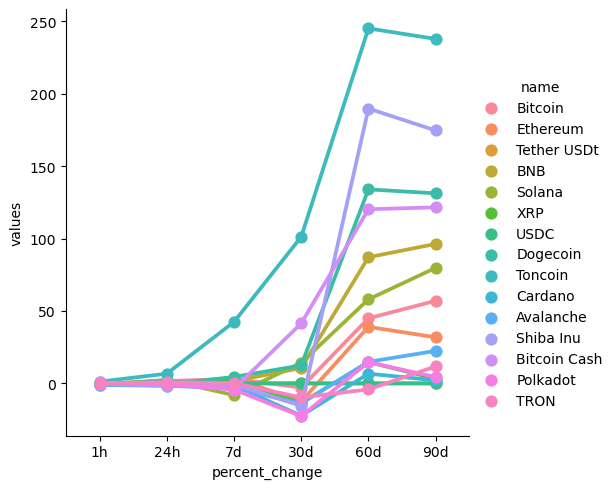

In [61]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [73]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,69768.96990,2024-04-11 09:56:43.248191


C:\Users\libor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\libor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

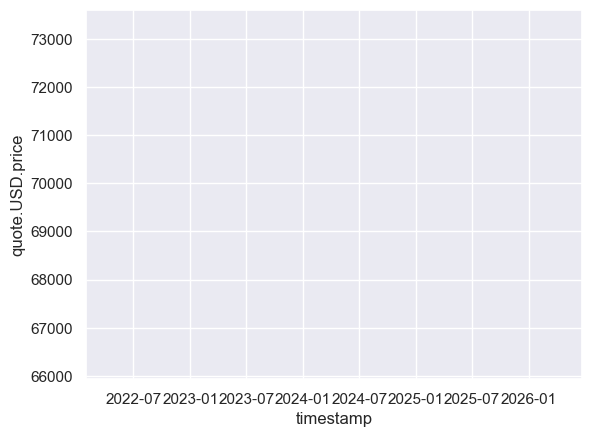

In [74]:
sns.set_theme(style = 'darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)